In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('preprocessed_features.csv')

/tmp/ipykernel_14720/1585858764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isAttentive', data=df, palette='Set2')


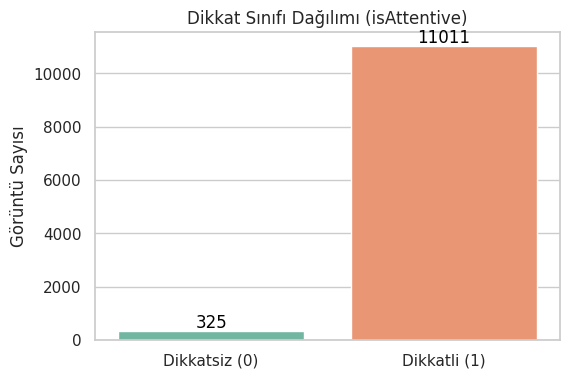

In [4]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='isAttentive', data=df, palette='Set2')
plt.title('Dikkat Sınıfı Dağılımı (isAttentive)')
plt.xticks([0, 1], ['Dikkatsiz (0)', 'Dikkatli (1)'])
plt.ylabel('Görüntü Sayısı')
plt.xlabel('')

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()


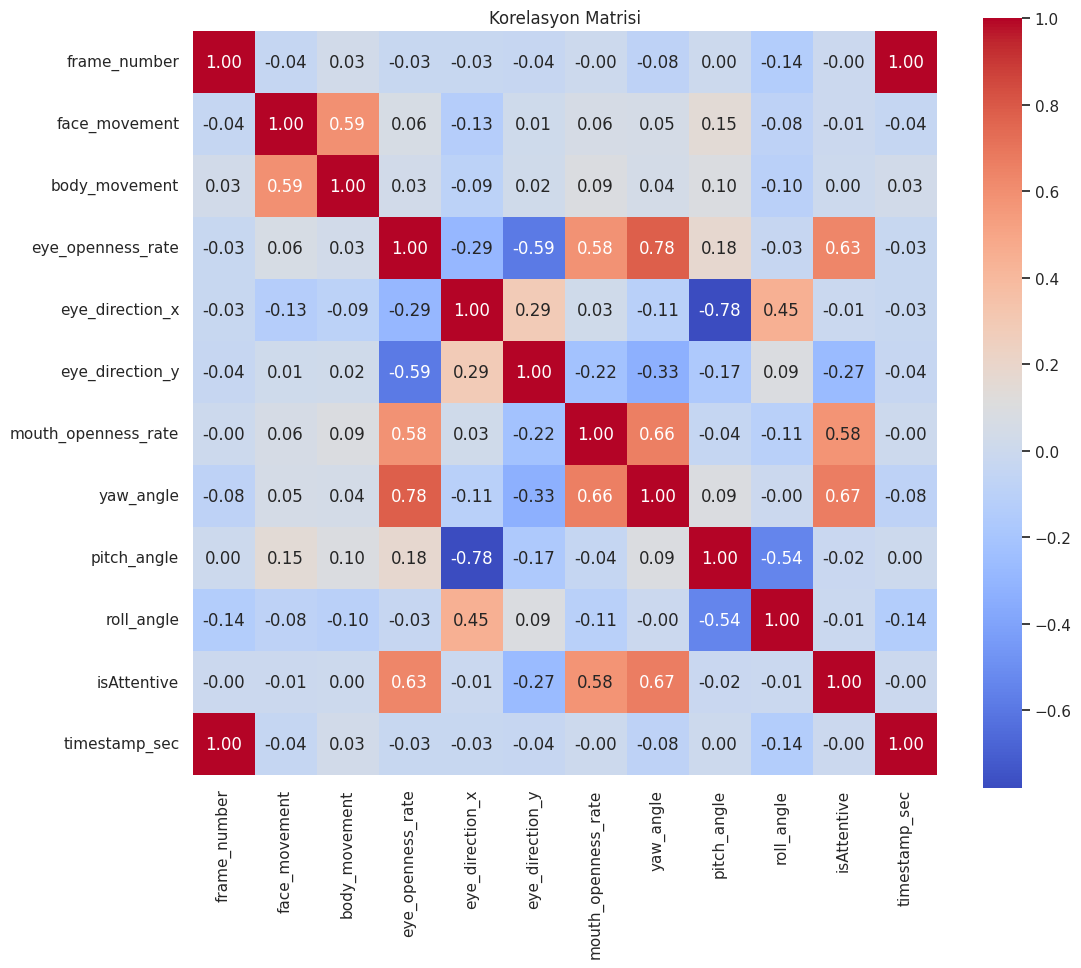

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasyon Matrisi')
plt.show()

In [7]:
# features = ['eye_openness_rate', 'eye_direction_x', 'eye_direction_y', 
#             'yaw_angle', 'pitch_angle', 'roll_angle', 'mouth_openness_rate']

# for feature in features:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x='isAttentive', y=feature, data=df, palette='Set3')
#     plt.title(f'{feature} vs isAttentive')
#     plt.xticks([0, 1], ['Dikkatsiz (0)', 'Dikkatli (1)'])
#     plt.show()

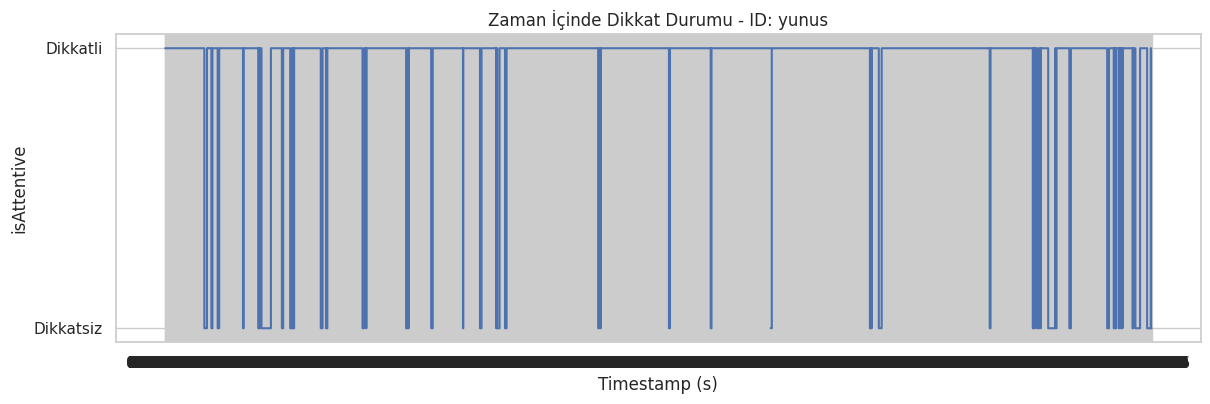

In [8]:
plt.figure(figsize=(14, 4))
person_id = 'yunus'
df_person = df[df['id'] == person_id]

plt.plot(df_person['timestamp'], df_person['isAttentive'], drawstyle='steps-post')
plt.title(f'Zaman İçinde Dikkat Durumu - ID: {person_id}')
plt.xlabel('Timestamp (s)')
plt.ylabel('isAttentive')
plt.yticks([0, 1], ['Dikkatsiz', 'Dikkatli'])
plt.grid(True)
plt.show()